### Imports

In [25]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
%autoreload 2

In [27]:
from IPython.display import display
from src.vfm.connection import Connection
from src.vfm.preprocessor import Preprocessor
from src.vfm.resampler import Resampler
from src.vfm.utils.descriptive_utils import *
from src.vfm.model.hybrid.physics_informed import PhysicsInformedHybridModel
import json

In [28]:
connection = Connection()
# Get client
client = connection.get_client()

In [29]:
df_all_wells = connection.get_data(client, wells=get_all_wells())
df_all_wells.columns

Index(['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'gl_mass_rate',
       'gl_open_ratio', 'qo_well_test', 'qg_well_test', 'qw_well_test',
       'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id'],
      dtype='object')

In [30]:
dependent_vars=get_depdendent_vars()
independent_vars=get_independent_vars()

In [31]:
preprocessor = Preprocessor()
df_all_wells_preprocessed = preprocessor.preprocess_wells(df=df_all_wells)
len(df_all_wells_preprocessed)

Total original record count 834
W06 original record count: 137
W06 Record count before target preprocessing: 100
eps=3.417602083918777e-07
W06 Record count after target preprocessing: 100
W06 Record count after preprocessing: 100
W08 original record count: 69
W08 Record count before target preprocessing: 66
eps=2.9518529494535888e-05
W08 Record count after target preprocessing: 66
W08 Record count after preprocessing: 66
W10 original record count: 222
W10 Record count before target preprocessing: 221
eps=3.350809591825767e-08
W10 Record count after target preprocessing: 221
W10 Record count after preprocessing: 221
W11 original record count: 154
W11 Record count before target preprocessing: 119
eps=1.0177683450396633e-08
W11 Record count after target preprocessing: 119
W11 Record count after preprocessing: 119
W15 original record count: 86
W15 Record count before target preprocessing: 86
eps=1.7896994683588753e-05
W15 Record count after target preprocessing: 86
W15 Record count after p

755

In [32]:
summarize_null(df_all_wells_preprocessed)

qo_well_test      0
qg_well_test      0
qw_well_test      0
well_code         0
dhp               0
dht               0
whp               0
wht               0
choke             0
dcp               0
gl_mass_rate      0
gl_open_ratio     0
qo_mpfm          30
qg_mpfm          30
qw_mpfm          30
wc_mpfm           0
gor_mpfm         35
wgr_mpfm         36
gor_well_test     0
wgr_well_test     0
well_id           0
time_idx          0
dtype: int64

In [33]:
df_train, df_val, df_test = get_random_train_val_test_split_per_well_temporal_order(df=df_all_wells_preprocessed)
print(f"Train={len(df_train)}, Validation={len(df_val)}, Test={len(df_test)}")

Train=517, Validation=85, Test=153


In [34]:
well_geometry: dict = None

with open(r"data\well_geometry.json", "r") as f:
    well_geometry = json.load(f)

In [35]:
model = PhysicsInformedHybridModel(dependant_vars=dependent_vars, independent_vars=independent_vars, well_geometry=well_geometry)
model.fit(df=df_train, df_val=df_val)

[Validation] Residual RMSE = 0.5895


In [36]:
physics_scores = model.score_physics(df_test)
physics_scores

{'W06': {'qo': {'r2': 0.8318564792714791,
   'mae': 9.949097005815709,
   'rmse': 12.845384736725848,
   'mape (%)': 9.51420745390591,
   'mpe (%)': 1.374853040200497},
  'qw': {'r2': 0.009973597225322539,
   'mae': 1.1748552555094878,
   'rmse': 1.333924015251832,
   'mape (%)': 4378.72774827879,
   'mpe (%)': 4339.531710023077},
  'qg': {'r2': 0.5987696644659148,
   'mae': 1997.512661091946,
   'rmse': 2482.1325266141293,
   'mape (%)': 13.634418654188668,
   'mpe (%)': -10.472946355295546},
  'wgr': {'r2': -1.0775517054112806,
   'mae': 9.814253848010756e-05,
   'rmse': 0.0001246906906998933,
   'mape (%)': 5676.702433494089,
   'mpe (%)': 5640.960670598311},
  'gor': {'r2': -245.33241960491318,
   'mae': 16.15302315496388,
   'rmse': 24.870472723255713,
   'mape (%)': 13.113729265723052,
   'mpe (%)': -9.93824146566691}},
 'W08': {'qo': {'r2': -0.0521497447157937,
   'mae': 8.735903001876606,
   'rmse': 12.052696419021027,
   'mape (%)': 44.58185176221078,
   'mpe (%)': 28.32855099

In [37]:
hybrid_scores = model.score_hybrid(df_test)
hybrid_scores

{'W06': {'qo': {'r2': 0.8817450054971945,
   'mae': 8.075959462674163,
   'rmse': 10.772507229733337,
   'mape (%)': 7.0441647177947635,
   'mpe (%)': -1.5336826331562434},
  'qw': {'r2': -1.2849803727881426,
   'mae': 1.5196933046274235,
   'rmse': 2.026510881186468,
   'mape (%)': 100.0,
   'mpe (%)': -100.0},
  'qg': {'r2': 0.9114930169313974,
   'mae': 860.3340122953608,
   'rmse': 1165.780680544845,
   'mape (%)': 8.445385660147466,
   'mpe (%)': -3.3327368392709777},
  'wgr': {'r2': -1.3533439652978494,
   'mae': 0.00010063804821075015,
   'rmse': 0.00013270913371825032,
   'mape (%)': 100.0,
   'mpe (%)': -100.0},
  'gor': {'r2': -219.10852813546066,
   'mae': 16.16608861219072,
   'rmse': 23.509407757319007,
   'mape (%)': 13.151713183214813,
   'mpe (%)': -1.1485594413876994}},
 'W08': {'qo': {'r2': 0.26604472273819657,
   'mae': 6.89374751927144,
   'rmse': 10.066540367802382,
   'mape (%)': 28.33976126770949,
   'mpe (%)': -2.369824310959393},
  'qw': {'r2': -0.1390747933631

In [38]:
mpfm_scores = model.score_mpfm(df=df_test)
mpfm_scores

{'W06': {'qo': {'r2': 0.9706692278995891,
   'mae': 3.9838181726524424,
   'rmse': 5.36498850565047,
   'mape (%)': 3.0823321918202735,
   'mpe (%)': 3.0823321918202735},
  'qw': {'r2': -0.8494351910625253,
   'mae': 1.382982918653115,
   'rmse': 1.8231704012891774,
   'mape (%)': 90.32527731358108,
   'mpe (%)': -90.15662919404906},
  'qg': {'r2': 0.946987622888743,
   'mae': 577.8459460384563,
   'rmse': 902.2288800515151,
   'mape (%)': 3.7323293672650713,
   'mpe (%)': 3.7323293672650713},
  'wgr': {'r2': -1.030604202362296,
   'mae': 9.301173660957514e-05,
   'rmse': 0.00012327379056213997,
   'mape (%)': 90.34952062497258,
   'mpe (%)': -90.34952062497258},
  'gor': {'r2': -10.35205378110288,
   'mae': 3.2006132032371717,
   'rmse': 5.339006797227127,
   'mape (%)': 2.574689123867692,
   'mpe (%)': 0.6724291676883561}},
 'W08': {'qo': {'r2': 0.7953510604253917,
   'mae': 4.107639754768799,
   'rmse': 5.31557426326212,
   'mape (%)': 22.52076066046276,
   'mpe (%)': 7.287665307253

In [39]:
# df_physics = scores_to_df(physics_scores, "Physics")
# df_hybrid  = scores_to_df(hybrid_scores,  "Hybrid")
# df_mpfm    = scores_to_df(mpfm_scores,    "MPFM")

# df_all = pd.concat([df_physics, df_hybrid, df_mpfm], ignore_index=False)

# for well in get_all_wells():
#     df_display = df_all[(df_all["well_id"] == well) & (df_all["metric"] == "r2") & (df_all["variable"].isin(["qg", "qo", "qw"]))]
#     print(df_display[["well_id", "variable", "model", "metric", "value"]].reset_index(drop=True))
    # display(
    # df_display
    # .sort_values(["well_id", "variable"])
    # )

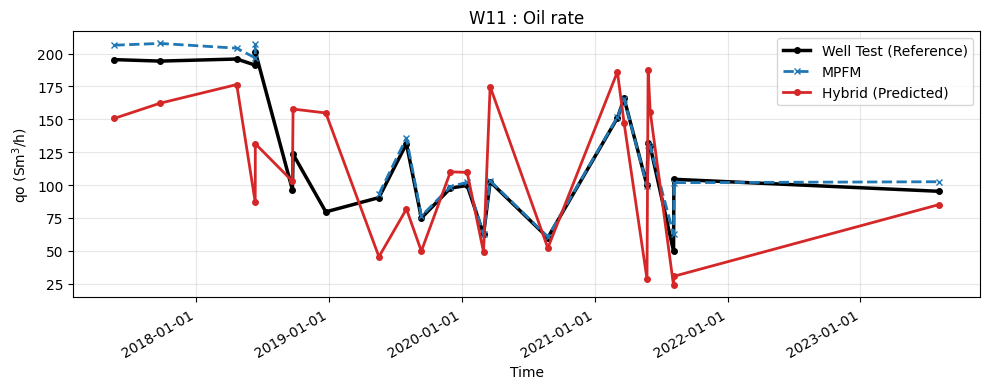

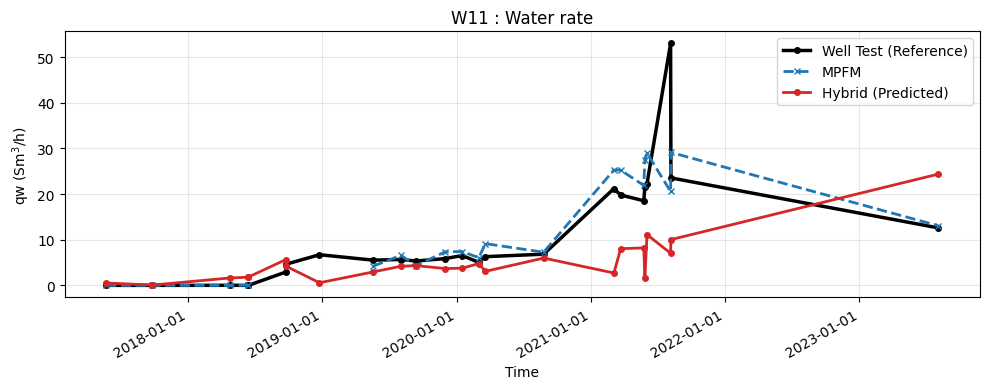

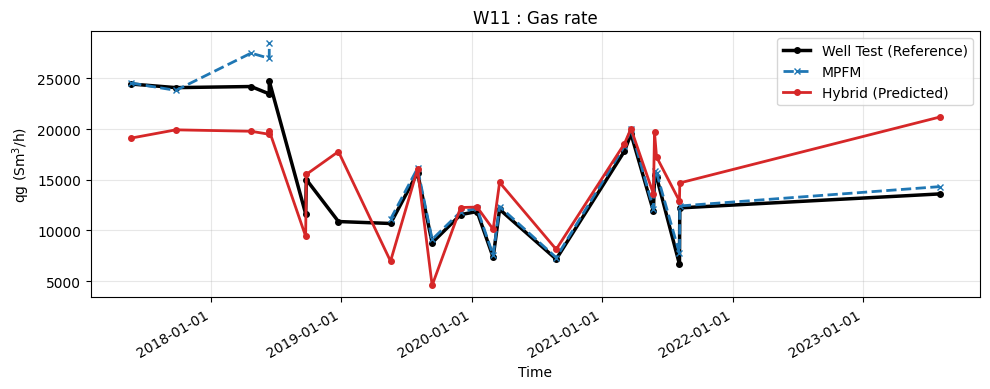

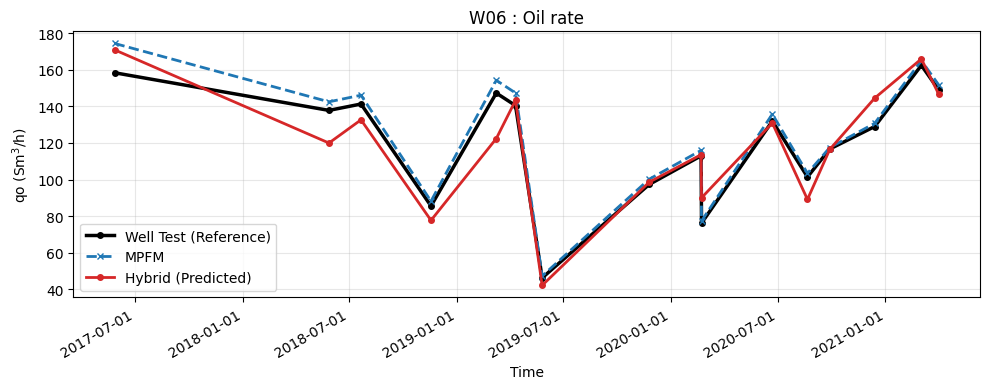

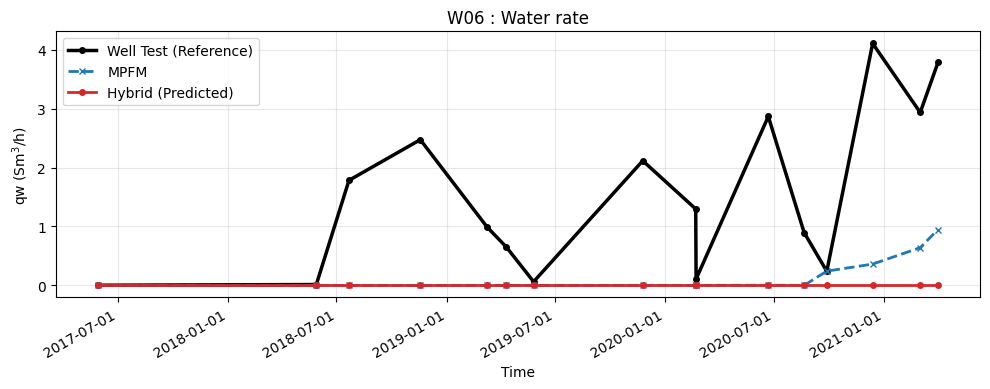

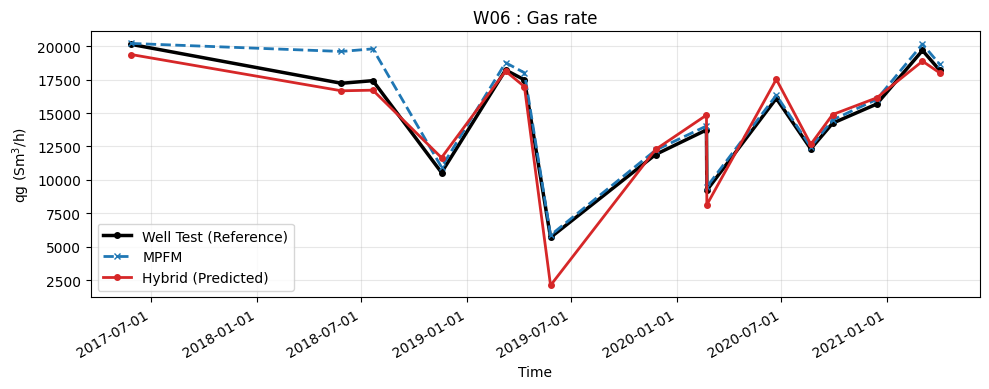

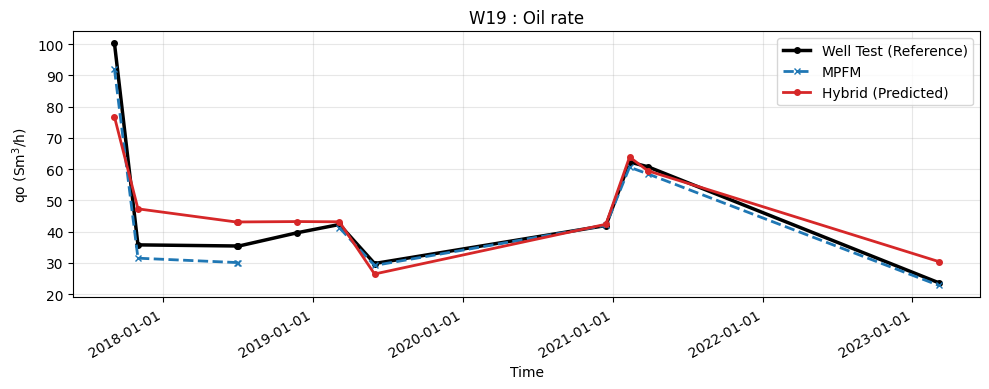

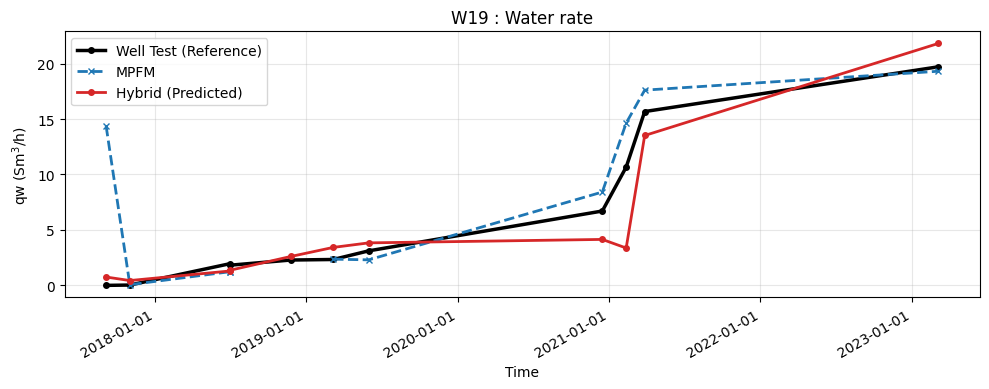

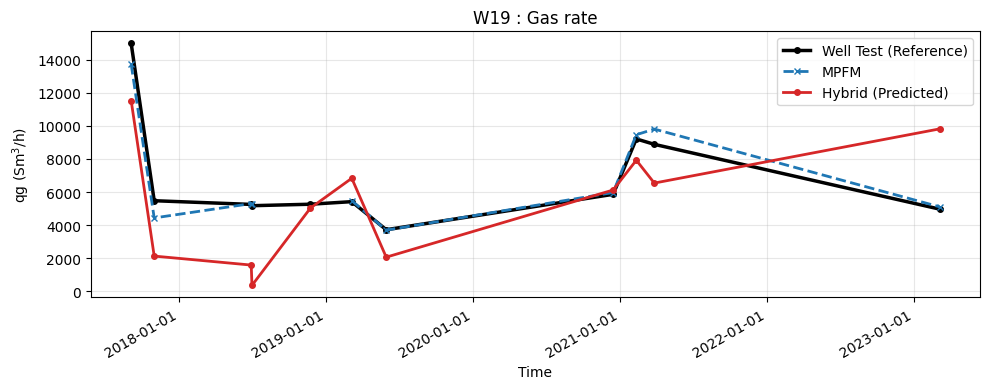

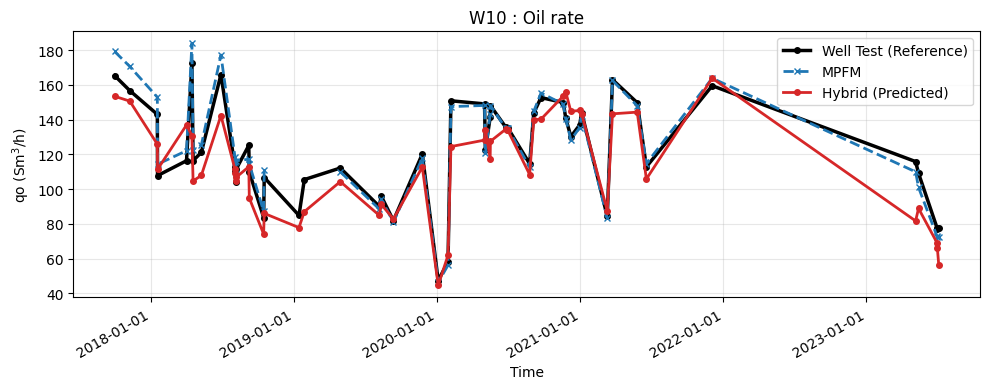

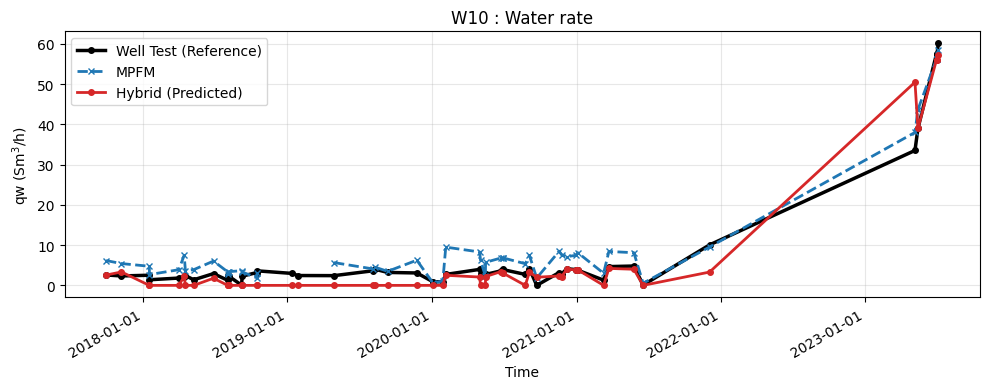

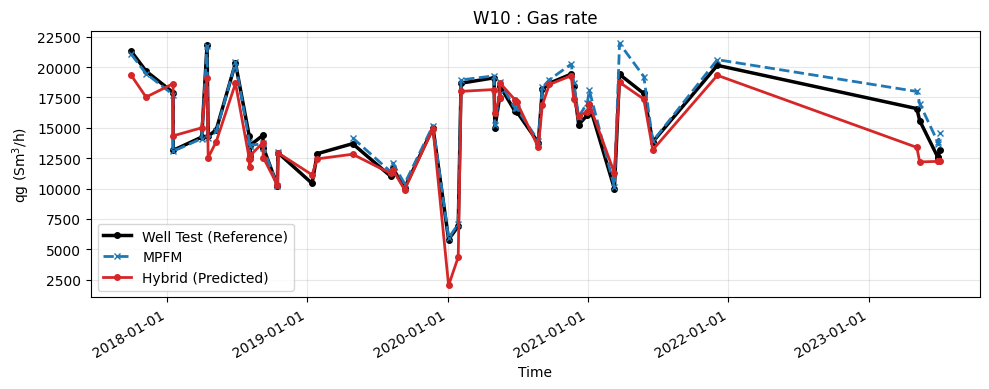

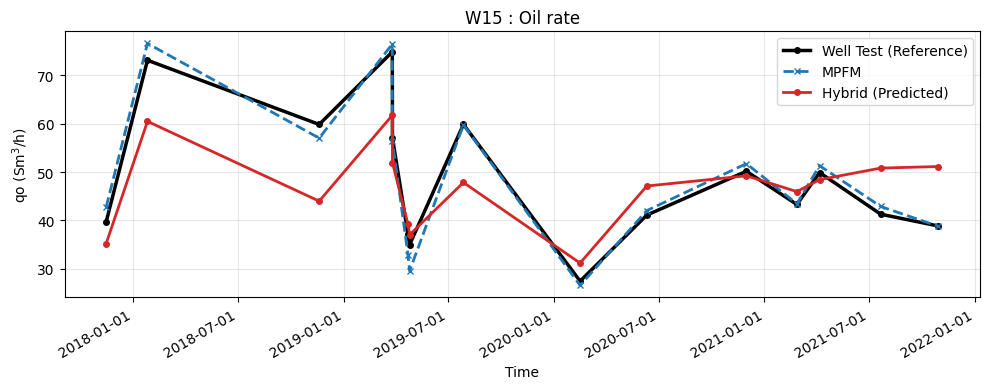

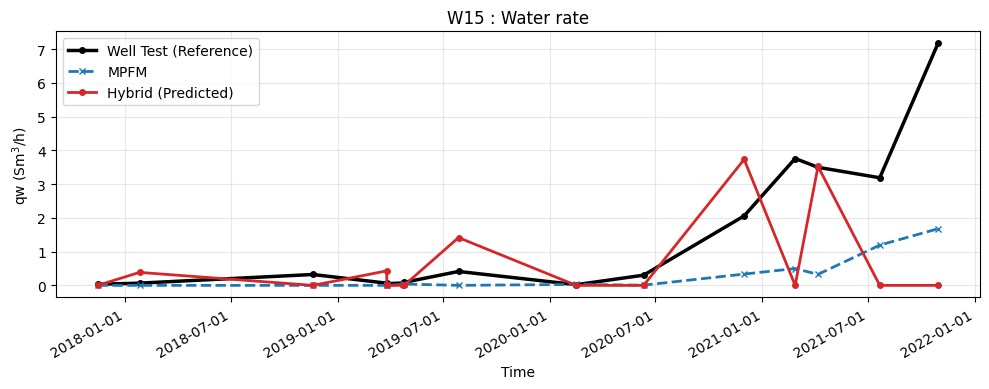

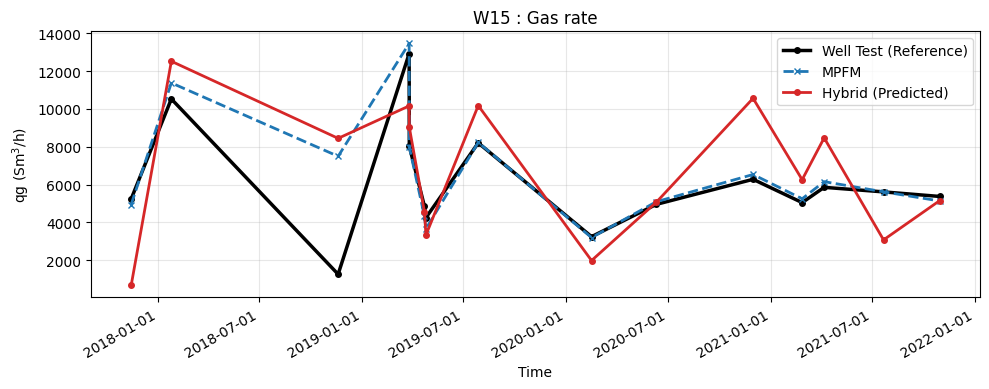

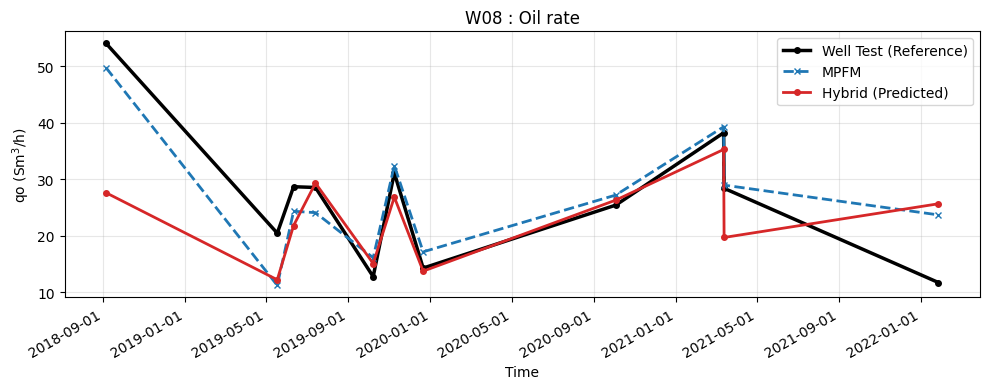

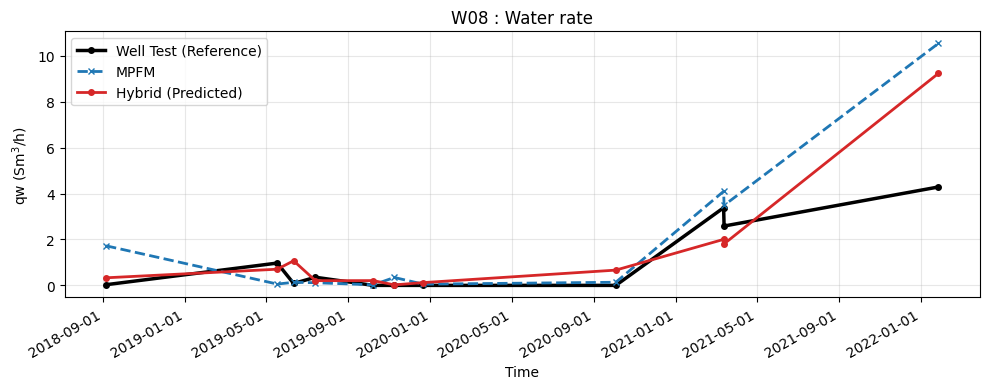

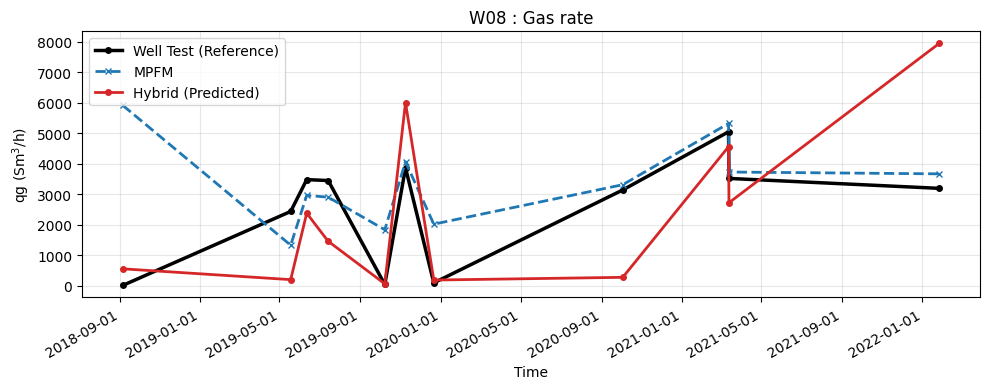

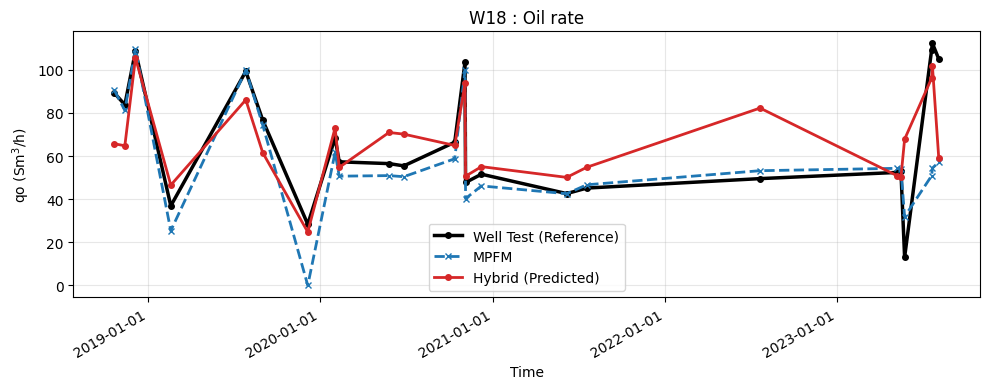

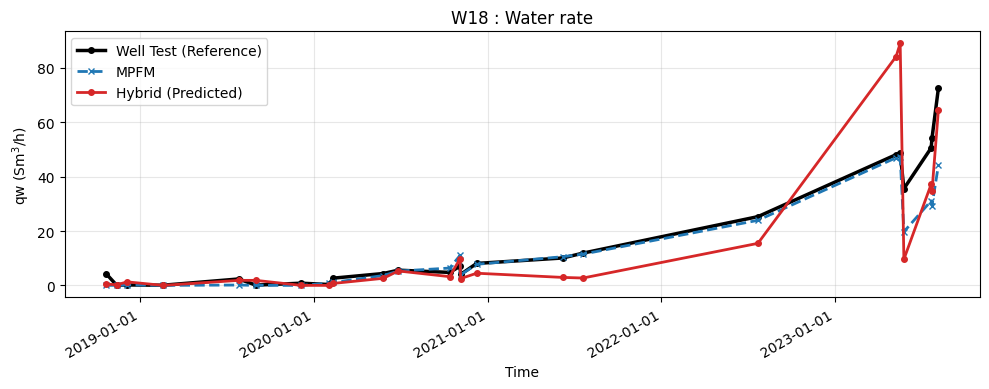

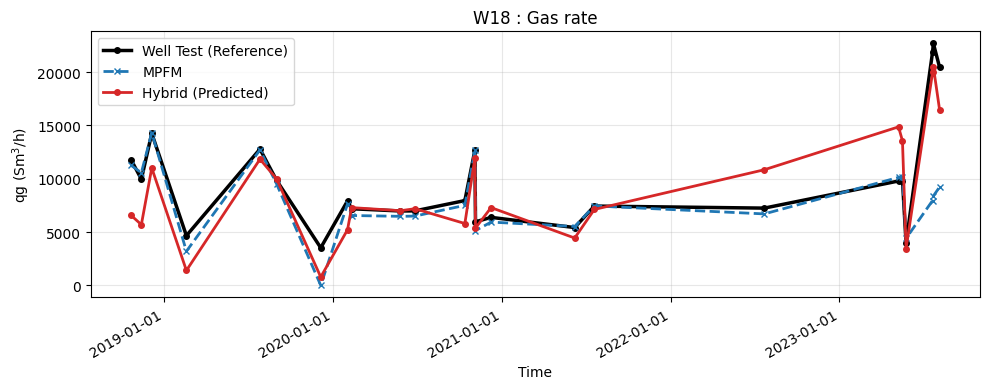

In [40]:
model.plot_predictions(df=df_test, is_hybrid_model=True)

### LOWO test

In [41]:
df_train_lowo, df_val_lowo, df_calibration_lowo, df_test_lowo = get_lowo_train_val_test_split(df=df_all_wells_preprocessed, test_well_id="W10")
print(f"Train={len(df_train_lowo)}, Val={len(df_val_lowo)}, Calibration={len(df_calibration_lowo)}, Test={len(df_test_lowo)}")

Train=417, Val=117, Calibration=21, Test=200


In [42]:
model_lowo = PhysicsInformedHybridModel(dependant_vars=dependent_vars, independent_vars=independent_vars, well_geometry=well_geometry)
model_lowo.fit(df=df_train_lowo, df_val=df_val_lowo)

[Validation] Residual RMSE = 0.7297


In [43]:
model_lowo.calibrate_physics_only(df=df_calibration_lowo)

In [44]:
model_lowo.score_physics(df_test_lowo)

{'W10': {'qo': {'r2': 0.14673591039644662,
   'mae': 17.424732689321015,
   'rmse': 29.926839445223376,
   'mape (%)': 19.402440702966572,
   'mpe (%)': 13.62236436123226},
  'qw': {'r2': -0.030114679673545863,
   'mae': 3.3045656418751905,
   'rmse': 10.782196155339683,
   'mape (%)': 326457734.589034,
   'mpe (%)': 326457706.7322297},
  'qg': {'r2': 0.5206534951435219,
   'mae': 2113.0712181865724,
   'rmse': 2853.098648544402,
   'mape (%)': 185.77785958397124,
   'mpe (%)': 163.82591074405303},
  'wgr': {'r2': -0.08670926019117475,
   'mae': 0.0003017868102284331,
   'rmse': 0.000978592208672927,
   'mape (%)': 48446.46621739147,
   'mpe (%)': 48422.455837354806},
  'gor': {'r2': -2.64392231481037,
   'mae': 21.2546851034349,
   'rmse': 30.458540187013323,
   'mape (%)': 137.60863048776528,
   'mpe (%)': 106.42162726212668}}}

In [45]:
model_lowo.score_hybrid(df_test_lowo)

{'W10': {'qo': {'r2': 0.8191734804010662,
   'mae': 10.689378960452473,
   'rmse': 13.776857972889568,
   'mape (%)': 10.043152387045488,
   'mpe (%)': 4.261839433609679},
  'qw': {'r2': -0.025414141002295443,
   'mae': 3.5578263619881785,
   'rmse': 10.757567790914196,
   'mape (%)': 185104652.65446195,
   'mpe (%)': 185104583.41109568},
  'qg': {'r2': 0.8125361207357791,
   'mae': 1366.2958549338853,
   'rmse': 1784.2298689902736,
   'mape (%)': 44.48348977596865,
   'mpe (%)': 35.46122086438657},
  'wgr': {'r2': -0.04336805493887952,
   'mae': 0.00030551308546973593,
   'rmse': 0.000958879066626049,
   'mape (%)': 23740.929916278707,
   'mpe (%)': 23667.491577680365},
  'gor': {'r2': -1.338882769742367,
   'mae': 15.987662617831791,
   'rmse': 24.402187349474346,
   'mape (%)': 57.42848187411321,
   'mpe (%)': 43.56619254178048}}}

In [46]:
model_lowo.score_mpfm(df=df_test_lowo)

{'W10': {'qo': {'r2': 0.9602153055601498,
   'mae': 3.8037694000100344,
   'rmse': 6.4862064735838185,
   'mape (%)': 3.190897439104174,
   'mpe (%)': 0.9071758978415019},
  'qw': {'r2': 0.924870022708089,
   'mae': 2.5177096881248593,
   'rmse': 2.9322871520668254,
   'mape (%)': 381902943.78132045,
   'mpe (%)': 381902931.6020492},
  'qg': {'r2': 0.9394639485871881,
   'mae': 517.9988710086019,
   'rmse': 1017.8596022190998,
   'mape (%)': 437.3079639947477,
   'mpe (%)': 436.55143240768837},
  'wgr': {'r2': 0.947666598332184,
   'mae': 0.0001730378841563874,
   'rmse': 0.00021636690001612815,
   'mape (%)': 86315.88397209927,
   'mpe (%)': 86303.97832185666},
  'gor': {'r2': 0.13748601435842445,
   'mae': 7.805174855968725,
   'rmse': 14.9308104677488,
   'mape (%)': 444.6367292424583,
   'mpe (%)': 441.151988053707}}}

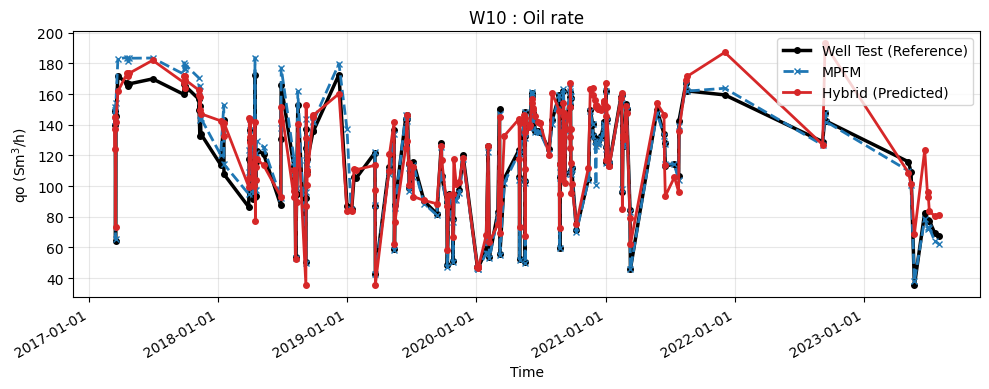

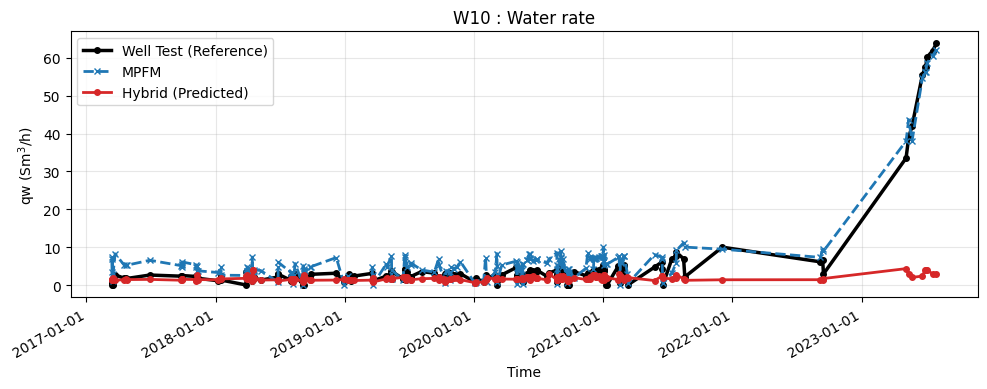

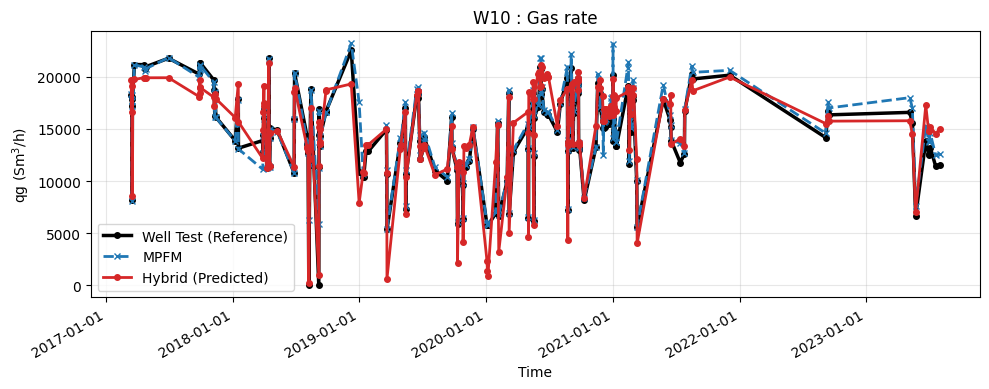

In [47]:
model_lowo.plot_predictions(df=df_test_lowo, model_tag_prefix="lowo")

### Resample and interpolate

In [48]:
# resampler = Resampler()
# df_resampled = resampler.resample_wells(df=df_all_wells_preprocessed, independent_vars=independent_vars)
# print(summarize_null(df=df_resampled))
# print(df_resampled.shape)

In [49]:
# df_resampled.index

In [50]:
# df_resampled.columns

In [51]:
# df_resampled[df_resampled["is_observed"] == 1].shape

In [52]:
# Monotonic
# df_resampled.groupby("well_id")["time_idx"].is_monotonic_increasing

In [53]:
# df_generated = model.generate_dense_well_rates(df=df_resampled)
# df_generated

In [54]:
# summarize_null(df_generated)